# Steganography

## - Steganography Text

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
im = input('enter the image name:')

enter the image name:StegnoImage.jpg


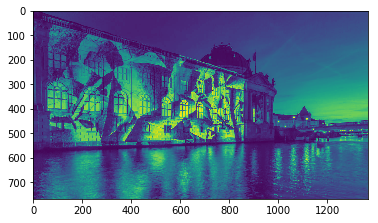

In [3]:
image = cv2.imread(im,cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [4]:
pixels = image
pixels

array([[27, 24, 28, ..., 66, 66, 65],
       [17, 13, 14, ..., 59, 59, 58],
       [20, 12, 11, ..., 55, 55, 54],
       ...,
       [15, 10, 11, ..., 52, 52, 54],
       [16, 11, 12, ..., 53, 53, 55],
       [36, 29, 29, ..., 54, 54, 56]], dtype=uint8)

In [5]:
pixels.shape

(768, 1366)

In [6]:
def genTextData(text):
    newd = []
    for i in text :
        newd.append(format(ord(i),'08b'))
    return np.array(newd)

In [7]:
def encode(image):
    text = input("enter the text to be encoded :")
    image1 = image.copy()
    newimage = []
    pixelimg = np.asarray(image1)
    n = pixelimg.shape[0]
    TextData = "".join(genTextData(text))
    j,count = 0,0
    for i in range(n):
        newimagerow = []
        for pixel in pixelimg[i]:
            if j < len(TextData):
                binpixel = format(bin(pixel))
                binpixel = binpixel.replace('0b','')
    #             print(binpixel[:-1])
                newpixel = binpixel[:-1] + TextData[j]
    #             print(newpixel)
                pixel = int(newpixel,2)
                j+=1
            elif count < 8:
                binpixel = format(bin(pixel))
                binpixel = binpixel.replace('0b','')
    #             print(binpixel[:-1])
                newpixel = binpixel[:-1] + '0'
    #             print(newpixel)
                pixel = int(newpixel,2)
                count += 1
            newimagerow.append(pixel)
        newimage.append(newimagerow)
    
    encodedImage = np.array(newimage)
    return encodedImage

In [8]:
def decode(image1):
    imagePixels = np.array(image1)
    list1 = []
#     textn = int(input("enter the len of text used :"))
    for i in range(imagePixels.shape[0]):
        character = []
        for j in imagePixels[i]:
            if(len(character) == 8):
                if(int("".join(character),2)) == 0 :
                    break
                character = []
            binpixel = format(bin(j))
#             print(binpixel)
            list1.append(binpixel[-1])
            character.append(binpixel[-1])
        else:
            continue
        break
    
#     print(len(list1))
    l = 0
    lis = []
    while l < len(list1):
        lis.append(chr(int("".join(list1[l:l+8]),2)))
        l += 8
    return "".join(lis)

enter the text to be encoded :qwerty
<class 'numpy.ndarray'>


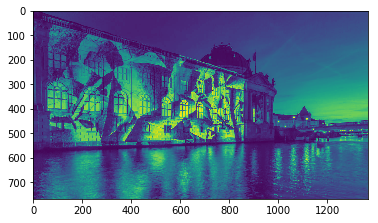

In [9]:
encoded_image = encode(image)
print(type(encoded_image))
cv2.imwrite('encoded_image.jpg', encoded_image)
plt.imshow(encoded_image)
encodedImage = cv2.imread('encoded_image.jpg')
# cv2.imshow('Encoded Image',encodedImage)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:
print('the decoded text is:')
listdecode = decode(encoded_image)
print(listdecode)

the decoded text is:
qwerty 
